## Code analysis by Ankur Kumar Shukla
## Date: 2022-06-10




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Extraction 

In [2]:
data = pd.read_csv('information/fraud.csv')
data.tail()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [3]:
#find step where isfruad is 1
data[data['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


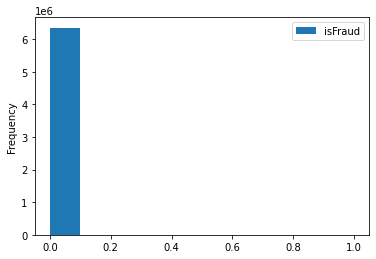

In [4]:
# plot if isFraud vs step
data.plot(x='step', y='isFraud', kind='hist')
plt.show()

In [5]:
#find sum of isFraud column
data['isFraud'].sum()

8213

In [6]:

# import sweetviz as sv

# report= sv.analyze(data)
# report.show_html("report.html")



# report.html is saved in folder ; It is done for detail exploration of data    */

In [7]:
# to find if it contain missing values
data.isnull().sum()



step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

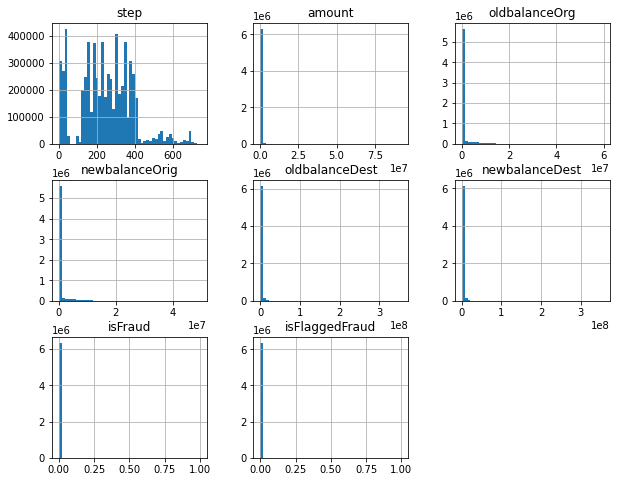

In [8]:
data.hist(bins=50, figsize=(10, 8))
plt.show()

### Data cleaning and preprocessing (statistical analysis)

In [9]:
# drop the columns that we don't want to use
data_clean = data.drop(['nameOrig', 'nameDest'], axis=1)
data_clean.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [10]:
# find correlations between the features and the target
corr = data_clean.corr()
corr


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [11]:
corr['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

We found that **newbalanceDest** has significantly less correlation value than other feature .


In [12]:
# plot the correlations
# import seaborn as sns
# plt.figure(figsize=(12, 9))
# plt.title('Correlation of Features with the Target')
# sns.heatmap(corr, vmax=.8, square=True)
# plt.show()

In [13]:

x_data= data.loc[:,['step','type','amount','oldbalanceOrg',	'newbalanceOrig','oldbalanceDest',	'newbalanceDest','isFlaggedFraud']]


In [14]:
# to drop the columns that have a correlation of 0.0 or tending to 0.0

x_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


There is feature named **type** . There may be possible that fruad ouccurs in the type of transaction. <br>
We need to perform **one hot encoding** for this feature and check the correlation value for different types of transactions.

In [15]:
# one hot encoding for type in x_data
data_clean = pd.get_dummies(data_clean, columns=['type'])
data_clean.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


In [16]:
corr = data_clean.corr()
corr['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_CASH_IN     -0.019089
type_PAYMENT     -0.025697
Name: isFraud, dtype: float64

Result : We find that in tranfer type create high POSITIVE corelation . <br>


In [17]:
x_data = data_clean.drop(['isFraud'], axis=1)
x_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [18]:
y_data = data_clean['isFraud']
y_data.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [19]:
# to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif.round(1)


,VIF Factor,features
0,1.0,step
1,4.0,amount
2,555.1,oldbalanceOrg
3,571.6,newbalanceOrig
4,68.1,oldbalanceDest
5,78.4,newbalanceDest
6,1.0,isFlaggedFraud
7,2.8,type_CASH_IN
8,2.1,type_CASH_OUT
9,1.0,type_DEBIT


oldbalanceOrg , newbalanceOrig, oldbalanceDest, newbalanceDest show high VIF value.
Hence we need to remove these features from the dataset.

Its obvious as **amount = abs(oldbalanceOrg - newbalanceOrg)**

VIF allows you to determine the strength of the correlation between the various independent variables. It is calculated by taking a variable and regressing it against every other variables.<br>

VIF calculates how much the variance of a coefficient is inflated because of its linear dependencies with other predictors.

In [20]:
# drop the columns that have a VIF factor of 10 or more
x_data = x_data.drop(['oldbalanceOrg' , 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)
x_data.head()

,step,amount,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0,0,0,0,1,0
1,1,1864.28,0,0,0,0,1,0
2,1,181.00,0,0,0,0,0,1
3,1,181.00,0,0,1,0,0,0
4,1,11668.14,0,0,0,0,1,0


In [21]:
# find frequency of step column
x_data['step'].value_counts()



19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

## Modeling

In [22]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)



### Logistic Regression

In [23]:
# # logistic regression
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(x_train, y_train)
# y_pred = logreg.predict(x_test)
# # test accuracy of logistic regression
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

0.9987104368954928

In [24]:
# # coieficient and intercept of logistic regression
# logreg.coef_




array([[-5.61064100e-02, -4.00338817e-06,  3.38390996e-09,
        -1.70342076e-05, -2.52696691e-05, -4.40771681e-06,
        -1.86865299e-04, -1.12862380e-06]])

In [25]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
# test accuracy of naive bayes and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9948173865483088


array([[1265653,    5230],
       [   1365,     276]], dtype=int64)

## 2nd approach by neural network 

In [ ]:
# # by neural network 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

# accuracy and confusion matrix




0.9987104368954928

## Gaining insights from the data

### 2. Describe your fraud detection model in elaboration.

In this problem i had used 3 different approaches to solve this problem. firstly i used logistic regression. It gave the accuracy of 0.99, but after the analysis of the data i found that it is not a good model. It had learned to respond Not a fruad to the data. There is probable reason which i can think is that there is not sufficient data of fruad case in front of non fruad case . Out of total 6362619 data nunber of fruad case is only 8213. <br>
Then i tried neural network which has similar problem as previous one . Accuracy being same 0.99. <br>
<br>
We needed probablistic approach which can provide better result even in reltively less learning data / so i used naive bayes classifier. Accuracy is 0.99. This time analysis of confusion matrix is also proved to be correct.<br>
In these i had used collinearity analysis and correlation analysis to find  colinear feature and the features which are highly correlated with each other . Hence used 'step','amount','type' and 'newbalanceDest'and isFlaggedFruad as the features which are highly correlated with each other. I had done one hot encoding for 'type'.<br>
Then model is trained .<br>
Then i used confusion matrix to find the accuracy of the model .<br>


### 3. How did you select variables to be included in the model?

In [ ]:
corr['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_CASH_IN     -0.019089
type_PAYMENT     -0.025697
Name: isFraud, dtype: float64

We checked multicolinearity and removed the features which are highly correlated with each other ie. **oldbalanceOrg , newbalanceOrig, oldbalanceDest, newbalanceDest**.


oldbalanceOrg , newbalanceOrig, oldbalanceDest, newbalanceDest show high VIF value.<br>
Hence we need to remove these features from the dataset.<br>

Its obvious as **amount = abs(oldbalanceOrg - newbalanceOrg)**

I had used logistic reggression model and Neural Network to predict the fraud .<br>
Accuracy of logistic regression model is **0.99** .<br>
Accuracy of Neural Network model is **0.99** .<br>

In order to select the variables to be included in the model, I had used the following steps: i find the co-relation between the feature to priorities the feature. We found that **newbalanceDest** has significantly less correlation value than other feature . <br> Then we checked multicolinearity using Vif technique. <br>


In [ ]:
vif.round(1)

,VIF Factor,features
0,1.0,step
1,4.0,amount
2,555.1,oldbalanceOrg
3,571.6,newbalanceOrig
4,68.1,oldbalanceDest
5,78.4,newbalanceDest
6,1.0,isFlaggedFraud
7,2.8,type_CASH_IN
8,2.1,type_CASH_OUT
9,1.0,type_DEBIT


If the value of Vif is greater than 10 , we remove the feature from the dataset as it is highly correlated with other features.Hence we have removed **oldbalanceOrg , newbalanceOrig, oldbalanceDest, newbalanceDest** from the dataset.

### 4. Demonstrate the performance of the model by using best set of tools.

Here i have used confusion matrix and accuracy score to find the accuracy of the model .<br>

In [ ]:
#performance of logistic regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


c:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.00      0.00      0.00      1641

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270883       0]
 [   1641       0]]
0.9987104368954928


In [ ]:
#performance of neural network model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


c:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.00      0.00      0.00      1641

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270883       0]
 [   1641       0]]
0.9987104368954928


In [ ]:
# performance of naive bayes model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.05      0.17      0.08      1641

    accuracy                           0.99   1272524
   macro avg       0.52      0.58      0.54   1272524
weighted avg       1.00      0.99      1.00   1272524

[[1265653    5230]
 [   1365     276]]
0.9948173865483088


Clearly visible that performance of navi bayes model is better than logistic regression model and neural network .<br> Coieficient matrix of navi bayes model is also provide better result .<br>

### 5. What are the key factors that predict fraudulent customer?

The key factor that predict the fraud are -<br>
1. Amount<br>
2. Type <br>
3. isFlaggedFruad<br>


### 6. Do these factors make sense? If yes, How? If not, How not?

1. Amount = more the amount more is chance that transaction is fraud.Yes it make sense as if a fruad is succesfull then he would like to take as many money as every time he may not be lucky . Normally people don't do those big ammount transaction <br>
2. Type = it is to be noted that fruad majorly occur in transfering money. Yes it make sense as in case of debit and payment  fraud is NEGATIVELY corelated . <br>
3. isFlaggedFruad =  The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.transaction which is flagged fruad are more likely to be fruad.<br>

### 7. What kind of prevention should be adopted while company update its infrastructure?

First of all limit the daily and monthly total transaction amount by analysing the normal expenditure of consumer . ALSO design system to be more sensetive to big amount and must have manual confirmation from consumer iself 
<br>
There seems the loop hole or bug in website or application which fruader is making use of . more of fruad is reported in trasfer of money . This depict the weak system of server which need to be identified and fixed . <br>
More attention should be given to flaggedfruad transaction . There must be call verification system that confirm transaction <br> Still there may be chance that frauder is making use of call forwarding feature .<br>
<br>
Need to build a unified system in which once the transaction start all control of device come under bank IT security system . <br>
Best way to reduce the fruad is to shift all system in blockchain technology .<br>

### 8. Assuming these actions have been implemented, how would you determine if they work?  

After the implementation of system , i would collect the transaction analysis and do same sort of analysis to find the frauder . IF  it found that percentage of fruad transaction is reduced then it indicate that given model is correct. <br>